### Weather Observations

Temperature is the one measure that seems to correlate highly with latitude, getting higher towards the equator. Humidity has somewhat of a correlation, but it's much weaker. Neither cloud cover nor windspeed have much relation to latitude. For the comparison of the northern to southern hemispheres, it should be noted there are more cities for the northern hemisphere in the sample set. This does not present any bias, however, since globally there is more land and thus more cities in the northern hemisphere.

In [142]:
import time
from citipy import citipy

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import datetime

import requests
import json
from config import ow_api_key as api_key

In [90]:
# Output File (CSV)
output_dir = "output_data"
output_data_file = f"{output_dir}/cities.csv"

### Generate random cities

In [45]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

coord_list = []
cities = []

In [46]:
# Create a set of random lat and lng combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
long = np.random.uniform(lng_range[0], lng_range[1], size=1500)
coord_list = list(zip(lat, long))

In [47]:
# Identify nearest city for each lat, lng combination
for coord in coord_list:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    if city not in cities:
        cities.append(city)

In [48]:
len(cities)

646

### Query API for Cities

In [136]:
base_url = f'https://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q='
temp = []
humidity = [] 
cloudiness = []
wind = []
city = []
latitude = []
longitude = []
country = []
date = []
record = 1
for c in cities:
    query_url = f'{base_url}{c}'
    response = requests.get(query_url).json()
    try:
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city.append(c)
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing record # {record} for {c}")
        record += 1
    except:
        print(f'{c} not found, skipping...')

    time.sleep(1)

# get time of analysis    
now = datetime.datetime.now()
today = f'{now.year}-{now.month}-{now.day}'

Processing record # 1 for rocha
Processing record # 2 for bredasdorp
Processing record # 3 for khanpur
Processing record # 4 for rikitea
Processing record # 5 for perez
Processing record # 6 for hasaki
Processing record # 7 for itatiaia
Processing record # 8 for tazovskiy
Processing record # 9 for isangel
Processing record # 10 for hobart
Processing record # 11 for yanam
duz not found, skipping...
Processing record # 12 for santa maria
Processing record # 13 for atar
Processing record # 14 for georgetown
Processing record # 15 for saint-lo
Processing record # 16 for nishihara
Processing record # 17 for luderitz
Processing record # 18 for cape town
toungoo not found, skipping...
Processing record # 19 for busselton
Processing record # 20 for lorengau
Processing record # 21 for mount gambier
Processing record # 22 for severo-kurilsk
Processing record # 23 for mataura
Processing record # 24 for amahai
taolanaro not found, skipping...
barentsburg not found, skipping...
Processing record # 

Processing record # 209 for xai-xai
Processing record # 210 for mehamn
Processing record # 211 for ukiah
Processing record # 212 for college
Processing record # 213 for virovitica
Processing record # 214 for moba
Processing record # 215 for provideniya
Processing record # 216 for shimoda
Processing record # 217 for nioro
Processing record # 218 for nuuk
Processing record # 219 for bathsheba
Processing record # 220 for cayenne
Processing record # 221 for gizo
Processing record # 222 for yarkovo
Processing record # 223 for williams lake
Processing record # 224 for acapulco
Processing record # 225 for glendive
Processing record # 226 for saint-philippe
Processing record # 227 for bardiyah
Processing record # 228 for johi
Processing record # 229 for gat
Processing record # 230 for vestmannaeyjar
mentok not found, skipping...
Processing record # 231 for sept-iles
Processing record # 232 for farafangana
belushya guba not found, skipping...
jiddah not found, skipping...
Processing record # 23

Processing record # 413 for leshukonskoye
Processing record # 414 for samarai
Processing record # 415 for ixtapa
Processing record # 416 for ngorongoro
Processing record # 417 for segou
Processing record # 418 for kieta
Processing record # 419 for itarema
Processing record # 420 for riberalta
Processing record # 421 for sabang
Processing record # 422 for grevesmuhlen
Processing record # 423 for saint-paul
Processing record # 424 for liepaja
Processing record # 425 for port-gentil
Processing record # 426 for guarapari
Processing record # 427 for leningradskiy
Processing record # 428 for anadyr
Processing record # 429 for kadoma
Processing record # 430 for baiyin
Processing record # 431 for sao paulo de olivenca
grand centre not found, skipping...
Processing record # 432 for hoa binh
Processing record # 433 for lahij
Processing record # 434 for wanxian
sorvag not found, skipping...
Processing record # 435 for otane
Processing record # 436 for nong phai
Processing record # 437 for koslan


In [165]:
weather_dict = {"city":city,
                "latitude" : latitude,
                "longitude" : longitude,
                "max temperature" : temp,
                "humidity": humidity,
                "cloudiness" : cloudiness,
                "wind speed" : wind,
                "country" : country,
                "date" : date
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()


,city,latitude,longitude,max temperature,humidity,cloudiness,wind speed,country,date
0,rocha,-34.4833,-54.3333,71.19,76,93,7.43,UY,1658948126
1,bredasdorp,-34.5322,20.0403,51.01,91,0,6.96,ZA,1658948315
2,khanpur,28.6453,70.6567,90.54,64,100,8.93,PK,1658948291
3,rikitea,-23.1203,-134.9692,73.90,74,100,13.98,PF,1658948316
4,perez,-32.9983,-60.7679,66.09,82,100,11.50,AR,1658948316


In [166]:
weather_df.describe()

,latitude,longitude,max temperature,humidity,cloudiness,wind speed,date
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,5.980000e+02
mean,20.299185,21.928959,70.908462,70.133779,52.847826,7.857759,1.658949e+09
std,32.451034,90.300799,14.402546,21.162500,40.050788,5.371416,2.870680e+02
min,-54.800000,-179.166700,29.750000,4.000000,0.000000,0.000000,1.658948e+09
25%,-6.505975,-58.334700,60.482500,59.000000,11.000000,3.902500,1.658949e+09
50%,24.682550,28.096900,73.345000,75.000000,52.000000,6.680000,1.658949e+09
75%,48.634225,103.207900,81.615000,87.000000,99.000000,10.360000,1.658949e+09
max,78.218600,179.316700,108.360000,100.000000,100.000000,32.010000,1.658950e+09


In [167]:
weather_df.loc[weather_df["humidity"]>100,:]

,city,latitude,longitude,max temperature,humidity,cloudiness,wind speed,country,date


In [168]:
# write cleaned data to csv
weather_df.to_csv(output_data_file,index=False)

### Scatter Plots

In [150]:
scatter_dir = f'{output_dir}/scatter_plots'

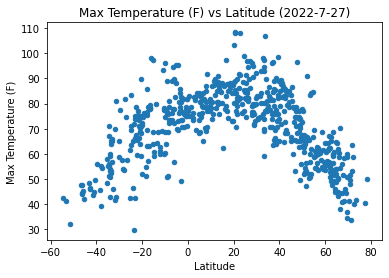

In [151]:
# Temperature (F) vs. Latitude
weather_df.plot(x="latitude",y="max temperature",kind="scatter")
plt.title(f"Max Temperature (F) vs Latitude ({today})")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.savefig(f'{scatter_dir}/temp_v_lat.png')
plt.show()


This graph is showing temperature as a function of latitude for a random set of cities across the globe. Temperature is highest, on average, around the equator. The peak appears to lie slightly north, around 20-40 degrees. This makes sense, given that this analysis was done during the summer season for the northern hemisphere and the most direct rays of the sun are concentrated near the Tropic of Cancer (~23 degrees N latitude).

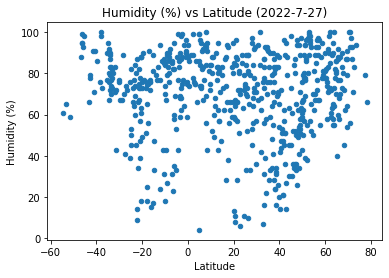

In [152]:
# Humidity (%) vs. Latitude
weather_df.plot(x="latitude",y="humidity",kind="scatter")
plt.title(f"Humidity (%) vs Latitude ({today})")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.savefig(f'{scatter_dir}/hum_v_lat.png')
plt.show()

This graph explores the connection between percent humidity and latitude for a random set of cities across the globe. There does not appear to be any correlation between latitude and humidity, though interestingly, the places with the loweest humidity are concentrated near the equator.

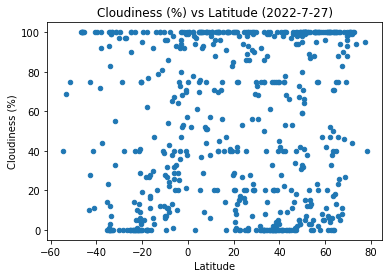

In [153]:
# Cloudiness (%) vs. Latitude
weather_df.plot(x="latitude",y="cloudiness",kind="scatter")
plt.title(f"Cloudiness (%) vs Latitude ({today})")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.savefig(f'{scatter_dir}/cloud_v_lat.png')
plt.show()

This graph explores the connection between percent cloud cover and latitude for a random set of cities across the globe. The percent of cloud cover does not appear to be correlated with latitude at all.

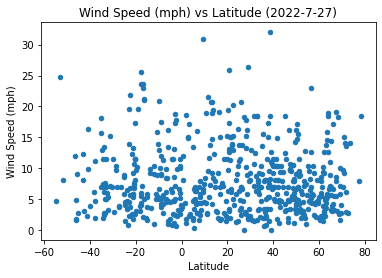

In [154]:
# Wind Speed (mph) vs. Latitude
weather_df.plot(x="latitude",y="wind speed",kind="scatter")
plt.title(f"Wind Speed (mph) vs Latitude ({today})")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.savefig(f'{scatter_dir}/wind_v_lat.png')
plt.show()

This graph explores the connection between wind speed and latitude for a random set of cities across the globe. There does not appear to be a correlation between latitude and wind speed. Most cities across the globe have wind speeds between 0 and 20 miles per hour, with only a small number of cities exceeding that.

### Linear Regression

In [155]:
lin_dir = f'{output_dir}/linear_regression_plots'

In [156]:
# separate data into norther and southern hemispheres
nh_weather_df = weather_df.loc[weather_df["latitude"]>0,:]
sh_weather_df = weather_df.loc[weather_df["latitude"]<0,:]

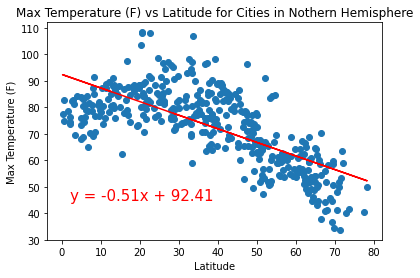

In [157]:
#Northern Hemisphere - Temperature (F) vs. Latitude
x_values = nh_weather_df["latitude"]
y_values = nh_weather_df["max temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Max Temperature (F) vs Latitude for Cities in Nothern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq,(2,45),fontsize=15,color="red")
plt.savefig(f'{lin_dir}/nh_temp_v_lat.png')
plt.show()

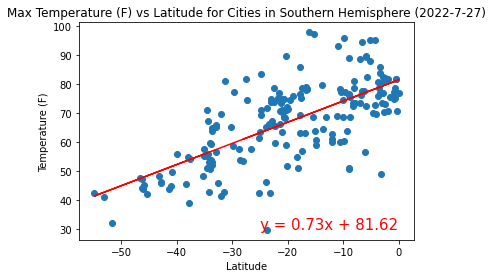

In [158]:
#Southern Hemisphere - Temperature (F) vs. Latitude
x_values = sh_weather_df["latitude"]
y_values = sh_weather_df["max temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f"Max Temperature (F) vs Latitude for Cities in Southern Hemisphere ({today})")
plt.xlabel('Latitude')
plt.ylabel("Temperature (F)")
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")
plt.savefig(f'{lin_dir}/sh_temp_v_lat.png')
plt.show()

#### Temperature versus Latitude
These linear regressions are showing a positive correlation between temperature and latitude for the southern hemisphere and a negative correlation for the northern hemisphere. This makes sense, since the lattitudes in the southern hemisphere increase in numeric value as you approach the equator (and so does the temperature) whereas in the northern hemisphere, latitude values decrease as you approach the equator while temperature increases.

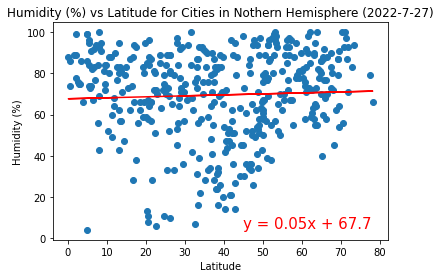

In [159]:
#Northern Hemisphere - Humidity (%) vs. Latitude
x_values = nh_weather_df["latitude"]
y_values = nh_weather_df["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f"Humidity (%) vs Latitude for Cities in Nothern Hemisphere ({today})")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.savefig(f'{lin_dir}/nh_humidity_v_lat.png')
plt.show()

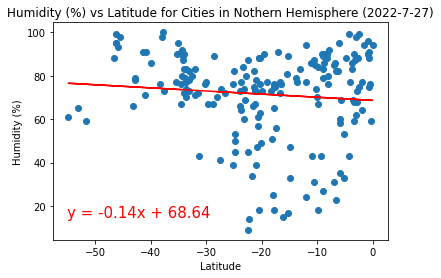

In [160]:
#Southern Hemisphere - Humidity (%) vs. Latitude
x_values = sh_weather_df["latitude"]
y_values = sh_weather_df["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f"Humidity (%) vs Latitude for Cities in Nothern Hemisphere ({today})")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.savefig(f'{lin_dir}/sh_humidity_v_lat.png')
plt.show()

#### Humidity versus Latitude
These regressions show a weak positive correlation between humidity and latitude for the northern hemisphere and a weak negative correlation for the southern hemisphere. This suggests relative humidity is lower closer to the equator and higher at the poles. This makes some sense, as the humidity values are relative to temperature. Since warm air can hold so much more water vapor than cold, the relative humidities at the equator are slightly lower, though it probably feels a lot more humid!

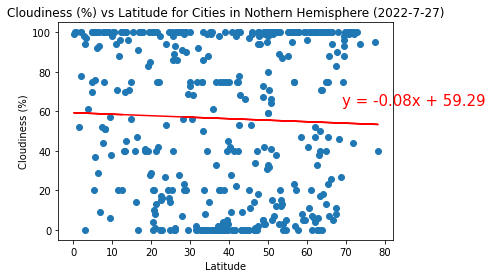

In [161]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = nh_weather_df["latitude"]
y_values = nh_weather_df["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f"Cloudiness (%) vs Latitude for Cities in Nothern Hemisphere ({today})")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(69,63),fontsize=15,color="red")
plt.savefig(f'{lin_dir}/nh_cloud_v_lat.png')
plt.show()

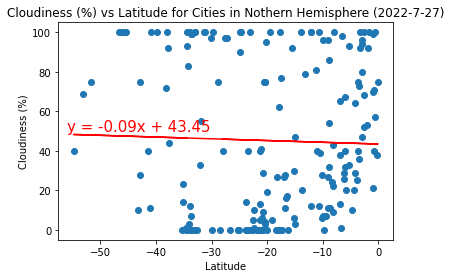

In [162]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = sh_weather_df["latitude"]
y_values = sh_weather_df["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f"Cloudiness (%) vs Latitude for Cities in Nothern Hemisphere ({today})")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-56,50),fontsize=15,color="red")
plt.savefig(f'{lin_dir}/sh_cloud_v_lat.png')
plt.show()

#### Cloudiness versus Latitude
These regressions show a very weak negative correlation between cloudiness and latitude for both hemispheres. The values for each dataset show a wide range of cloudiness levels across all the latitudes without much of a descernable pattern.

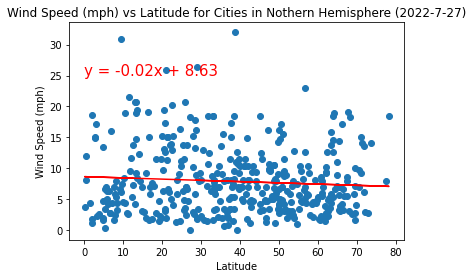

In [163]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = nh_weather_df["latitude"]
y_values = nh_weather_df["wind speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f"Wind Speed (mph) vs Latitude for Cities in Nothern Hemisphere ({today})")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.savefig(f'{lin_dir}/nh_wind_v_lat.png')
plt.show()

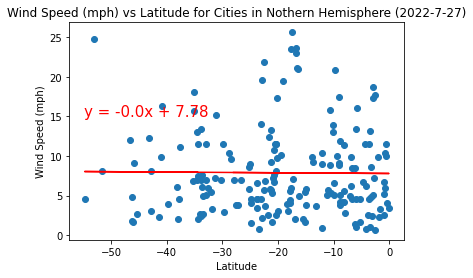

In [164]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = sh_weather_df["latitude"]
y_values = sh_weather_df["wind speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f"Wind Speed (mph) vs Latitude for Cities in Nothern Hemisphere ({today})")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.savefig(f'{lin_dir}/sh_wind_v_lat.png')
plt.show()

#### Wind Speed versus Latitude
These regressions show no correlation between wind speed and latitude for either hemisphere. As the y-intercepts are pretty similar, it can be assumed that average wind speeds are also similar between the hemispheres.